In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


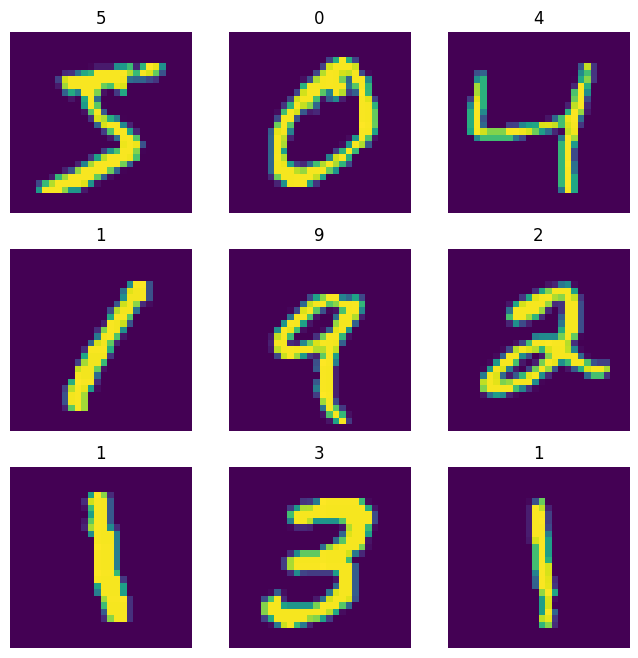

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [6]:
# Normalize each image by dividing by the maximum pixel value (255)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=-1)
x_test = tf.keras.utils.normalize(x_test, axis=-1)


Building Model

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

C:\Users\VAISHNAVI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [11]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15


C:\Users\VAISHNAVI\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8476 - loss: 0.5185 - val_accuracy: 0.9581 - val_loss: 0.1381
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9616 - loss: 0.1227 - val_accuracy: 0.9586 - val_loss: 0.1369
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9737 - loss: 0.0841 - val_accuracy: 0.9728 - val_loss: 0.0880
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0606 - val_accuracy: 0.9692 - val_loss: 0.0957
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0487 - val_accuracy: 0.9749 - val_loss: 0.0872
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9751 - val_loss: 0.0911
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0307 - val_accuracy: 0.9717 - val_loss: 0.0977
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accurac

In [12]:
import cv2

In [13]:
image = cv2.imread('img_80.jpg')[:,:,0]
image = np.invert(np.array([image]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
0


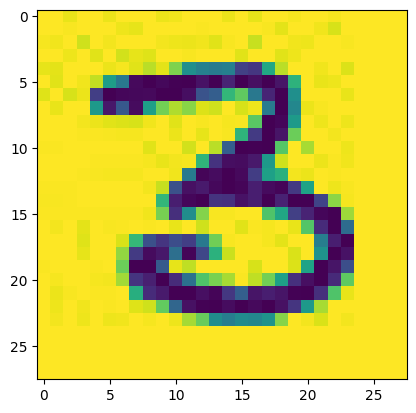

In [14]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [16]:
model.save('path_to_save_model/my_model.h5')

In [17]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


In [18]:
!npm install localtunnel


added 6 packages, and audited 1525 packages in 7s

263 packages are looking for funding
  run `npm fund` for details

22 vulnerabilities (3 low, 6 moderate, 13 high)

To address issues that do not require attention, run:
  npm audit fix

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


npm notice 
npm notice New minor version of npm available! 10.3.0 -> 10.9.2
npm notice Changelog: <https://github.com/npm/cli/releases/tag/v10.9.2>
npm notice Run `npm install -g npm@10.9.2` to update!
npm notice 


In [21]:
!streamlit run path_to_save_model\my_model.h5

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, not .h5.
For more information, please see https://docs.streamlit.io


In [ ]:
!npx localtunnel --port 8501